### Soham Vyas

In [1]:
import pandas as pd
import openpyxl

In [2]:
import numpy as np

## Variable Initialization

In [3]:
xls = pd.ExcelFile("Daily Gen pdpu-From-1-01-2021 (2).xlsx")

In [4]:
years = ["2012","2013","2014","2015","2016","2017","2018","2019","2020"]

In [5]:
year = "2015"

In [6]:
# label_list = ["Grid" ,
# "Module Cleaning",
# "Rainy day",
# "No Module Cleaning",
# "MCB Replacement",
# "Inverter Maintenance",
# "Transformer replacement and maintenance",
# "Cable and Fuse maintenance",
# "Plant Shutdown",
# "Inverter",
# "Internet",
# "Battery",
# "Cloudy",
# "Module Cleaning by rains",]
# # label_list

In [7]:
label_dict = {
    "Grid Failure" : [["Grid failure","Grid supply failure"], []],
    "Inverter" : [["Inverter"], ["fuse link" , "Module Cleaning"]],
    "Module Cleaning" : [["Module Cleaning"], ["no module cleaning"]],
    "Rainy day" : [["Rainy day"], []] ,
    "No Module Cleaning" : [["No Module Cleaning"], []] ,
    "Transformer replacement and maintenance" : [["Transformer replacement and maintenance" , "transformer"], []] ,
    "Cable and Fuse maintenance" : [["Cable and Fuse maintenance","MCB Replacement" , "fuse link"], []] ,
    "Plant Shutdown" : [["Plant Shutdown"], []] ,
    "Internet" : [["Internet"], []] ,
    "Battery" : [["Battery"], []] ,
    "Cloudy" : [["Cloudy"], []] ,
    "Module Cleaning by rains" : [["Module Cleaning by rains"], []]
}
    

In [8]:
# label_dict = {
#     "Grid Failure" : [["Grid","Grid supply failure"], []],
#     "Inverter Issue" : [["Inverter"], ["Module Cleaning"]],
#     "Module Cleaning" : [["Module Cleaning"], ["No Module Cleaning"]],
#     "Rainy day" : [["Rainy day"], []] ,
#     "No Module Cleaning" : [["No Module Cleaning"], []] ,
#     "MCB Replacement" : [["MCB Replacement"], []] ,
#     "Inverter Maintenance" : [["Inverter Maintenance"], []] ,
#     "Transformer replacement and maintenance" : [["Transformer replacement and maintenance"], []] ,
#     "Cable and Fuse maintenance" : [["Cable and Fuse maintenance"], []] ,
#     "Plant Shutdown" : [["Plant Shutdown"], []] ,
#     "Internet" : [["Internet"], []] ,
#     "Battery" : [["Battery"], []] ,
#     "Cloudy" : [["Cloudy"], []] ,
#     "Module Cleaning by rains" : [["Module Cleaning by rains"], []]
# }
# label_dict

## Functions

In [9]:
def reconstruct(xls, year):
    """
    It helps to remodel the csv to habituated df
    """

    df = pd.read_excel(xls, year)
    df = df[4:]
    column_names = {"Project Name" : "Date", "Unnamed: 1" : "1104500527", "PDPU-SEIPL, Gujarat 2010" : "1104500529", 
                    "Unnamed: 3" : "1.104501e+09", "Unnamed: 4" : "7802195.0", "Unnamed: 5" : "2100570073/ 2100567820/ 2100567898"}

    df = df.rename(columns=column_names)
    column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed",
                   "Unnamed: 13" : "WO#", "Unnamed: 14" : "NO-OFF-CLEAN MODULES"}
    
    if int(year) < 2015:
        if int(year) == 2012:
            column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Unnamed: 7" : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed"
                    }
        else:
            column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed"
                    }
    if int(year) == 2020:
        column_names = {"Unnamed: 6" : "Total Generation (KWH)", "Generation of "+year : "Aggregate Meter Reading (KWH)",
                   "Unnamed: 8" : "Difference", "Unnamed: 9" : "SEEDs data (KWH)",
                   "Unnamed: 10" : "Insolation", "Unnamed: 11" : "PR (%)", "Unnamed: 12" : "Any Issues/Problems Observed",
                        "Unnamed: 13" : "WO#", "Unnamed: 14" : "NO-OFF-CLEAN MODULES"
                    }

    df = df.rename(columns=column_names)
    df = df[3:]
    df_test = df.copy()
#     print(df_test)
    df_test = df_test.reindex(df_test.columns.tolist() + list(label_dict.keys()), axis=1)
    if int(year) < 2014:
        df_test.drop(df_test.iloc[:, 13:], inplace = True, axis = 1)
    return df_test

In [10]:
def labeling(df_test, label_list):
    final_result = []
    for index, row in df_test.iterrows():
        issue = row["Any Issues/Problems Observed"]
        print(index,issue)
        row_list = []
#         for (i,j) in enumerate(label_dict.iterms()):
#             for value in j:
#                 for label, stop in value:
                    
        for i in label_list:
            if i.lower() in str(issue).lower():
                print("check 1:",i)
                row_list.append(1)
                df_test.loc[index, i] = 1

            else:
                row_list.append(0)
                df_test.loc[index, i] = 0
        #end_for_labels
        final_result.append(row_list)
    #end_for_rows
    #print("\n\n",df_test.iloc[0])
        
    return final_result, df_test
    

In [11]:
def labeling2(df_test, label_dict):
    final_result = []
    for index, row in df_test.iterrows():
        issue = row["Any Issues/Problems Observed"]
        print(index,issue)
        row_list = []
#         for (i,j) in enumerate(label_dict.iterms()):
#             for value in j:
#                 for label, stop in value:
                    
        for i,j in label_dict.items():
            if any(ext in str(issue).lower() for ext in list(map(str.lower, j[0]))):
#                 print(j[1], any(text.lower() in str(issue).lower() for text in j[1]))
                if any(text.lower() in str(issue).lower() for text in j[1]):
                    print("break word appear " + str(j[1]) + " for " + str(j[0]))
                    row_list.append(0)
                    df_test.loc[index, i] = 0
                    continue
                print("check 1:",i)
                row_list.append(1)
                df_test.loc[index, i] = 1

            else:
                row_list.append(0)
                df_test.loc[index, i] = 0
        #end_for_labels
        final_result.append(row_list)
    #end_for_rows
    #print("\n\n",df_test.iloc[0])
        
    return final_result, df_test

## Running and labeling

In [12]:
df_obj = dict()
res_obj = dict()

In [13]:
years = ['2021']

In [14]:
for year in years:
    try:
        print(year)
        df_test = reconstruct(xls,year)
        res, final_df = labeling2(df_test, label_dict)
        print("labeling done", year)
        final_df = final_df.reset_index(drop=True)
        final_df.dropna(subset=["Date"], inplace=True)
        df_obj[year] = final_df
        res_obj[year] = res
    except:
        print("We are having problem in this year:",year)
#         df_test = reconstruct(xls,year)
#         print(df_test['Central Inverter 250 KW each total 4'])
        print(df_test.columns)

2021
7 Module Cleaning has been done in Row-M,N,O,P and Row-J,K,L Inverter No-3 and 2 total module cleaning-1617
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
8 Module Cleaning has been done in Row-I, inverter-2 & Row-A,B,C,D,E,F,G,H inverter no-1 & Row-A Inverter No-4 and total module cleaning-1458
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
9 nan
10 Module Cleaning has been done in Row-A,B,C,D,E,F,G,H,I,J Inverter No-4 total module cleaning-1566
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
11 Today we are cleaning all inverter Door filters. & Module Cleaning has been done in Row- K,L, Tracker 1,2,3, and Row-M,N,O,P,Q,R,S,T, Inverter No- 3 and 4, total module cleaning-1440 &  Today we are chang the new 1 MC4 conecter in the inverter no-1 - AJB-No-1.
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
12

53 Module Cleaning has been done in Row-A,B,C Inverter No-1 & Row-A,B,C,D,E,F,G inverter No-4 total module cleaning -1200
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
54 Module Cleaning has been done in Row-I,J,K,L Inverter No-4 & Trecker 1,2,3 & Row-R,S,T inverter no-3 total module cleaning -1092
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
55 Module Cleaning has been done in Row-M,N,O,P,Q Inverter No-3 & Row-K,L Inverter No-2  total module cleaning - 1449
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
56 Today we are change the new (5) mc4 conecter in the inverter no-3 AJB No-116. & today we are found (2)MC4 connector burn in inverter no-3 AJB NO-116 string NO-2 ++ive site  &--ive site we replaced all-2 MC4 connector & started the string.& module cleaning has been done in Row-I,J inverter no-2 & Row-D,E,F,G,H, inverter no-1 total module cleanin

check 1: Module Cleaning
119 nan
120 nan
121 nan
122 nan
123 Module cleaning has been done in  Row-A,B,C,D,E,F,G, Inverter No-4  total module cleaning -990
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
124 Grid failure from-05:04 to 05:08 & Module Cleaning has been done in Row-H,I,J,K,L Inverter No-4 & Tracker-1,2,3 total module cleaning -924
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
125 Module cleaning has been done in  Row-M,N,O,P,Q,R,S,T, Inverter No-3  total module cleaning -1092
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
126 Module Cleaning has been done in Row-I,J,K,L, Inverter No-2 & Row-G,H, Inverter No-1 total module cleaning -1533
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
127 Module Cleaning has been done in Row-A,B,C,D,E Inverter No-1 total module cleaning -

183 Module Cleaning has been done in Row-A,B,C,D,E,F Inverter No-1 & Row-A,B,C,D,E Inverter No-4 total module cleaning -1266
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
184 nan
185 Module cleaning has been done in  Row-F,G,H,I,J,K,L Inverter No-4   tracker 1,2,3   total module cleaning -1320
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
186 nan
187 Module cleaning has been done in  Row-M,N,O,P,Q,R,S,T inverter No-3 total module cleaning -1092 
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
188 Module cleaning has been done in  Row-I,J,K,L inverter No-2 total module cleaning -1092 & Grid failure from-03:04 to 04:02 & 05:20 to 05:25
check 1: Grid Failure
break word appear ['fuse link', 'Module Cleaning'] for ['Inverter']
check 1: Module Cleaning
189 Module cleaning has been done in  Row-A,B,C,D,E,F,G,H,inverter No-1 total module cleaning -1113 & Gr

In [15]:
# res, final_df = labeling(df_test, label_list)

In [16]:
#res

In [17]:
pd.set_option("display.max_columns", None)

In [18]:
# pd.set_option("display.max_rows", None)

In [17]:
# final_df = final_df.reset_index(drop=True)
# final_df.dropna(subset=["Date"], inplace=True)

In [18]:
# final_df.head(50)

## Results

In [19]:
df_obj['2021'].head(10)

,Date,1104500527,1104500529,1.104501e+09,7802195.0,2100570073/ 2100567820/ 2100567898,Total Generation (KWH),Aggregate Meter Reading (KWH),Difference,SEEDs data (KWH),Insolation,PR (%),Any Issues/Problems Observed,WO#,NO-OFF-CLEAN MODULES,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2021-01-01 00:00:00,514,746,721,756,37.83,2774.83,2605.5,169.33,2775,3.299,0.819848,"Module Cleaning has been done in Row-M,N,O,P a...",NaN,1617,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-02 00:00:00,498,721,681,730,36.27,2666.27,2504.25,162.02,2667,3.06,0.849482,"Module Cleaning has been done in Row-I, invert...",NaN,1458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-03 00:00:00,590,882,831,918,51.27,3272.27,3099,173.27,3273,3.936,0.810482,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-04 00:00:00,504,716,685,725,36.5,2666.5,2506.5,160,2667,3.228,0.805271,"Module Cleaning has been done in Row-A,B,C,D,E...",NaN,1566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-05 00:00:00,544,786,751,787,41.5,2909.5,2730,179.5,2910,3.487,0.81338,Today we are cleaning all inverter Door filter...,NaN,1440,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-01-06 00:00:00,661,1023,967,1068,62.39,3781.39,3597,184.39,3782,4.555,0.809256,"Module Cleaning has been done in Row-I,J,k,l I...",NaN,1533,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-01-07 00:00:00,221,312,298,313,16.25,1160.25,1046.25,114,1161,3.304,0.342488,"Module Cleaning has been done in Row-A,B,C,D,E...",NaN,960,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2021-01-08 00:00:00,384,520,494,524,21.7,1943.7,1787.25,156.45,1944,2.216,0.855026,"Module Cleaning has been done in Row-D,E,F,G,H...",NaN,1626,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-01-09 00:00:00,493,710,690,746,33.29,2672.29,2510.25,162.04,2673,3.106,0.838784,Module Cleaning has been done in Row-L Inverte...,NaN,1344,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-01-10 00:00:00,509,752,711,817,39.38,2828.38,2667,161.38,2829,3.089,0.892622,Grid failure from -10:15 to 10:22 & 11:32 to ...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df_obj.keys()

dict_keys(['2021'])

## Append data to excel

In [21]:
writer = pd.ExcelWriter('output_21.xlsx')
for i in years:
    df_obj[i].to_excel(writer,sheet_name=i)
writer.save()
writer.close()

/usr/local/lib/python3.9/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


# Prediction

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
import matplotlib.pyplot as plt

In [302]:
df_12 = df_obj['2012']
df_12 = df_12.append(df_obj['2013'], ignore_index=True)
df_12 = df_12.append(df_obj['2014'], ignore_index=True)
df_15 = df_obj['2015']
df_15 = df_15.append(df_obj['2016'], ignore_index=True)
df_15 = df_15.append(df_obj['2017'], ignore_index=True)
df_15 = df_15.append(df_obj['2018'], ignore_index=True)
df_15 = df_15.append(df_obj['2019'], ignore_index=True)

In [303]:
train = df_15.drop(["Date", "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)", "Insolation", 
                    "PR (%)", "Any Issues/Problems Observed", "WO#", "NO-OFF-CLEAN MODULES"], axis=1)
train = train.append(df_12.drop(["Date", "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", 
                    "Aggregate Meter Reading (KWH)", 
                    "Difference", "SEEDs data (KWH)", "Insolation", 
                    "PR (%)", "Any Issues/Problems Observed"], axis=1))

In [304]:
# df_15 = df_15.drop(["WO#", "NO-OFF-CLEAN MODULES"], axis=1)
df_15 = df_15.append(df_12, ignore_index=True)
y_train = df_15['Total Generation (KWH)'].to_numpy().reshape(-1,1)
x_train = df_15.drop(["Date", "1104500527", "1104500529", "1.104501e+09", "7802195.0", "2100570073/ 2100567820/ 2100567898", "Total Generation (KWH)", "Aggregate Meter Reading (KWH)", "Difference", "SEEDs data (KWH)", "Insolation", "PR (%)", "Any Issues/Problems Observed", "WO#", "NO-OFF-CLEAN MODULES"], axis=1)



In [305]:
train

,Total Generation (KWH),Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,2162.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,3322.93,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3908.96,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4394.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3719.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,2838.9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,3549.18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
906,2139.84,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,3223.74,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
x_train

,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2730,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2732,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2733,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
x_train.isna().any()

Grid Failure                               False
Inverter                                   False
Module Cleaning                            False
Rainy day                                  False
No Module Cleaning                         False
Transformer replacement and maintenance    False
Cable and Fuse maintenance                 False
Plant Shutdown                             False
Internet                                   False
Battery                                    False
Cloudy                                     False
Module Cleaning by rains                   False
dtype: bool

In [114]:
poly = PolynomialFeatures(degree = 3)
x_poly_new = poly.fit_transform(x_train)
 
poly.fit(x_poly_new, y_train)
poly_model = LinearRegression()
poly_model.fit(x_poly_new, y_train)
poly_res_new = poly_model.predict(x_poly_new)

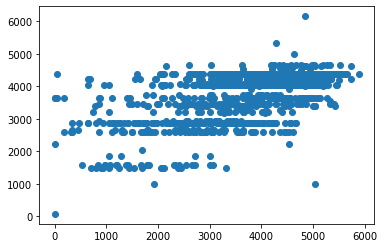

In [115]:
plt.scatter(y_train,poly_res_new)

##  Score

In [116]:
from sklearn.metrics import r2_score

In [117]:
r2 = r2_score(y_train,poly_res_new)

In [118]:
r2

0.3508151216095179

## Time series & regression

In [136]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [213]:
import statsmodels.tsa.statespace as sarimax 

In [307]:
y_train_test = df_15['Total Generation (KWH)']

In [389]:
len(y_train_test)

2735

In [308]:
x_train

,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2730,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2732,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2733,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
x_train.isna().any()

Grid Failure                               False
Inverter                                   False
Module Cleaning                            False
Rainy day                                  False
No Module Cleaning                         False
Transformer replacement and maintenance    False
Cable and Fuse maintenance                 False
Plant Shutdown                             False
Internet                                   False
Battery                                    False
Cloudy                                     False
Module Cleaning by rains                   False
dtype: bool

In [310]:
x_train_test = x_train

In [311]:
dim = y_train_test.size

In [312]:
y_train_test = y_train_test.to_numpy().reshape(dim,1)

In [313]:
y_train_test.ndim

2

In [314]:
x_train_test

,Grid Failure,Inverter,Module Cleaning,Rainy day,No Module Cleaning,Transformer replacement and maintenance,Cable and Fuse maintenance,Plant Shutdown,Internet,Battery,Cloudy,Module Cleaning by rains
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2730,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2732,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2733,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
y_train_test.shape, x_train_test.shape

((2735, 1), (2735, 12))

In [332]:
len(df_15['Total Generation (KWH)'].to_list())

2735

In [401]:
y = df_15['Total Generation (KWH)'].to_numpy()
y.ndim

1

In [423]:
model = VAR(endog = y, exog=x_train_test.to_numpy())
# model.endog = df_15['Total Generation (KWH)']
model_fit = model.fit()

prediction = model_fit.forecast(df_15['Total Generation (KWH)'].to_numpy(),steps=5)

ValueError: Only gave one variable to VAR

In [190]:
prediction

array([[ 4.47668060e-01,  6.94172503e-02,  7.55311549e-01,
         2.00689042e-03,  6.53602292e-02,  1.49658075e-02,
         4.58118808e-02,  6.14933771e-04, -3.67888974e-04,
         1.34519764e-03,  1.71189763e-02,  0.00000000e+00]])

In [194]:
y_train

array([[2162.5],
       [3322.93],
       [3908.96],
       ...,
       [3732.03],
       [4063.88],
       [4093.9]], dtype=object)

In [223]:
np.isnan(df_15['Total Generation (KWH)'].to_list())

array([False, False, False, ..., False, False, False])

In [232]:
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [371]:
arima_mod = sarimax.sarimax.SARIMAX(endog=df_15['Total Generation (KWH)'].to_list(), order=(1,1,1), seasonal_order=(1,1,1,5), exog=x_train_test)


In [372]:
arima_mod = arima_mod.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10057D+00    |proj g|=  7.10390D-02


 This problem is unconstrained.



At iterate    5    f=  8.04729D+00    |proj g|=  2.08362D-02

At iterate   10    f=  8.04069D+00    |proj g|=  7.56182D-03

At iterate   15    f=  8.03564D+00    |proj g|=  6.30945D-03

At iterate   20    f=  7.91870D+00    |proj g|=  7.63976D-02

At iterate   25    f=  7.91339D+00    |proj g|=  8.42073D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     26     30      1     0     0   1.490D-05   7.913D+00
  F =   7.9133889874858525     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [405]:
res_res = SARIMAXResults.predict(self=arima_mod,start=0, end=364)

In [406]:
len(res_res)

365

In [378]:
res = arima_mod.predict()

In [418]:
len(y[0:365])

365

In [415]:
res_res

0        75.116908
1      1697.575178
2      3043.851029
3      3717.502942
4      4559.655473
          ...     
360    4395.889801
361    4073.841700
362    2373.047839
363    3833.651732
364    3763.153659
Name: predicted_mean, Length: 365, dtype: float64

In [419]:
r2_res_arima = r2_score(list(y[0:365]), res_res.to_list())

In [420]:
r2_res_arima

0.5031604489008132

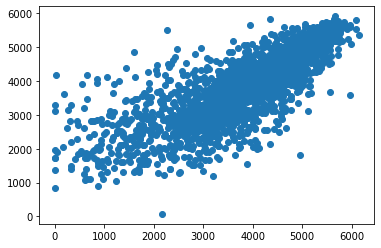

In [421]:
plt.scatter(y_train,res)

Test

In [424]:
import statsmodels.api as sm

In [431]:
from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
# dates = mdata[['year', 'quarter']].astype(int).astype(str)

# quarterly = dates["year"] + "Q" + dates["quarter"]

# from statsmodels.tsa.base.datetools import dates_from_str

# quarterly = dates_from_str(quarterly)

# mdata = mdata[['realgdp','realcons','realinv']]

# mdata.index = pd.DatetimeIndex(quarterly)

# data = np.log(mdata).diff().dropna()

# # make a VAR model
# model = VAR(data)

In [432]:
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19
